<a href="https://colab.research.google.com/github/suvarnak/Analytics-Playground/blob/master/Autoencoder_simple_Devnagari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 784 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoded)
print("autoencoder model created")

Using TensorFlow backend.


autoencoder model created


In [0]:
# this model maps an input to its encoded representation
encoder = Model(inputs=input_img, outputs=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

In [0]:
!pip install livelossplot


In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
 
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# plt.imshow(x_train[2001], cmap='gray')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)



11493376/11490434 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)


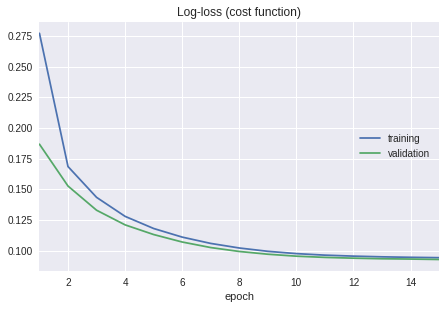

In [0]:
from livelossplot import PlotLossesKeras

autoencoder.fit(x_train, x_train,
                nb_epoch=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[PlotLossesKeras()],
               )

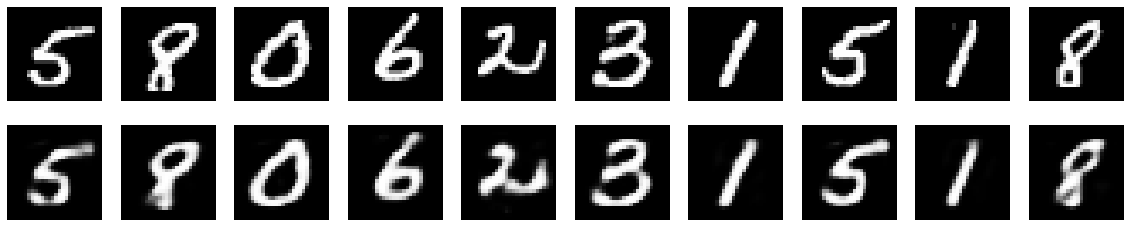

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
start=random.randint(0,9995)

for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[start+i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[start+i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Now we would use the pre-trained generative model on similar dataset such as devnagari


In [0]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 19.3MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&prompt=select_account&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline

Enter verification code: ··········


AuthorizationError: ignored

In [0]:
#   URL for devnagari datasethttps://drive.google.com/file/d/1_JaGEKXEQ6plkEtu7XFEq0BPr7v0Dhu-/view?usp=sharing
download = drive.CreateFile({'id': '1_JaGEKXEQ6plkEtu7XFEq0BPr7v0Dhu-'})
#download = drive.CreateFile({'id': '1JeDV5rTk3IT4f46U1Gw2EeyIfj_pPejDyHamJEoiez4'})
download.GetContentFile('DevanagariHandwrittenCharacterDataset.zip')

In [0]:
!mkdir data

In [0]:
train_filename = 'notMNIST_large.tar.gz'
test_filename = 'notMNIST_small.tar.gz'


In [0]:
train_filename = 'notMNIST_large.tar.gz'
test_filename = 'notMNIST_small.tar.gz'
import os;
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
#train_folders = maybe_extract(train_filename)
#test_folders = maybe_extract(test_filename)


In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        #imgplot = plt.imshow(img)
        return img
        print(filename)
        break
        if img is not None:
            images.append(img)
    return images
x_test = numpy.ndarray(shape=(4,784), dtype=float)
x_test = x_test.reshape(4,784)
x_test[0] = load_images('notMNIST_small/A/').reshape(1,784)
x_test[1]= load_images('notMNIST_small/B/').reshape(1,784)
x_test[2] = load_images('notMNIST_small/C/').reshape(1,784)
x_test[3] = load_images('notMNIST_small/D/').reshape(1,784)


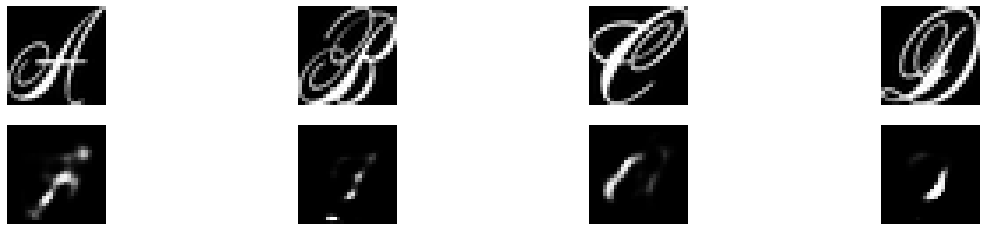

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 4  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        #imgplot = plt.imshow(img)
        return img
        print(filename)
        break
        if img is not None:
            images.append(img)
    return images
x_test = numpy.ndarray(shape=(4,784), dtype=float)
x_test = x_test.reshape(4,784)

x_test[0] = load_images('notMNIST_large/A/').reshape(1,784)
x_test[1]= load_images('notMNIST_large/B/').reshape(1,784)
x_test[2] = load_images('notMNIST_large/C/').reshape(1,784)
x_test[3] = load_images('notMNIST_large/D/').reshape(1,784)


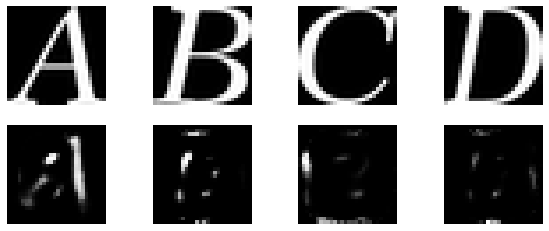

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 4  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()